# Data explorations

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

### Đọc dữ liệu

In [3]:
df = pd.read_csv('data.csv', sep='\t')
df.head(5)

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company
0,Kẻ Đánh Cắp Giấc Mơ,A thief who steals corporate secrets through t...,Your mind is the scene of the crime,PG-13,148.0,"Action, Adventure, Sci-Fi","dream, ambiguous ending, subconscious, mindben...",8.8,74.0,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2344754,292.58,"July 16, 2010 (United States)","United States, United Kingdom","English, Japanese, French","Fortress Mountain, Kananaskis Country, Alberta...","Warner Bros., Legendary Entertainment, Syncopy"
1,Hố Đen Tử Thần,A team of explorers travel through a wormhole ...,Mankind was born on Earth. It was never meant ...,C13,169.0,"Adventure, Drama, Sci-Fi","astronaut, saving the world, space travel, wor...",8.6,74.0,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",1821351,188.02,"November 7, 2014 (United States)","United States, United Kingdom, Canada",English,Iceland,"Paramount Pictures, Warner Bros., Legendary En..."
2,Kỵ Sĩ Bóng Đêm Trỗi Dậy,Eight years after the Joker's reign of anarchy...,The Legend Ends,PG-13,164.0,"Action, Drama","dc comics, batman character, bruce wayne chara...",8.4,78.0,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",1701579,448.14,"July 20, 2012 (United States)","United States, United Kingdom","English, Arabic","Mehrangarh Fort, Jodhpur, Rajasthan, India","Warner Bros., Legendary Entertainment, DC Ente..."
3,Hành Trình Django,"With the help of a German bounty-hunter, a fre...","Life, liberty and the pursuit of vengeance.",R,165.0,"Drama, Western","racial vengeance, racial violence, slavery, on...",8.4,81.0,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",1549444,162.81,"December 25, 2012 (United States)",United States,"English, German, French, Italian","Evergreen Plantation, 4677 Highway 18, Edgard,...","The Weinstein Company, Columbia Pictures"
4,Sói Già Phố Wall,"Based on the true story of Jordan Belfort, fro...",Earn. Spend. Party.,R,180.0,"Biography, Comedy, Crime","based on true story, stockbroker, female nudit...",8.2,75.0,Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie, ...",1404990,116.90,"December 25, 2013 (United States)",United States,"English, French","Portofino, Genoa, Liguria, Italy","Red Granite Pictures, Appian Way, Sikelia Prod..."


### Số dòng và cột

In [4]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1000 rows and 18 columns!


Các cột:
- `name`: Tên phim
- `overview`: Mô tả tổng quát phim
- `tagline`: Một văn bản ngắn dùng để làm rõ một ý tưởng hoặc được thiết kế với một dạng hiệu ứng ấn tượng
- `certificate`: Phân loại phim ( Ví dụ 'R' là phim cấm người dưới 18 tuổi, 'C13' là cấm người dưới 13 tuổi)
- `runtime`: Thời lượng phim (min)
- `genre`: Thể loại
- `keywords`: Từ khóa để dễ dàng tìm kiếm hoặc thể hiện sự tương quan giữa cái bộ phim
- `imdb_rate`: Số điểm đánh giá từ IMDB
- `metascore`: Số điểm đánh giá từ Metacritic
- `director	`: Đạo diễn 
- `stars`: Các ngôi sao của phim
- `nvote`: Số lượt đánh giá
- `gross`: Doanh thu của phim (M)
- `release_date`: Ngày phát hành
- `countries`: Quốc gia của công ty hoặc chi nhánh quản lý toàn bộ bộ phim
- `language` : Vì phim phát hành ở nhiều quốc gia nên sẽ có nhiều ngôn ngữ hỗ trợ (bao gồm cả ngôn ngữ gốc)
- `locations` : Những nơi phim thực hiện
- `company` : Công ty chịu trách nhiệm sản xuất

Các dòng: Mỗi dòng là thông tin của một bộ phim

### Có dòng nào trùng lắp không


In [5]:
any(df.duplicated())

False

### Kiểu dữ liệu:

In [6]:
pd.DataFrame(pd.concat([df.dtypes, df.isnull().sum()], axis=1)).T.rename(index={0:'type', 1:'null values'})

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company
type,object,object,object,object,float64,object,object,float64,float64,object,object,int64,float64,object,object,object,object,object
null values,0,0,72,33,0,0,1,0,19,0,0,0,95,0,0,0,36,0


Giá trị ở cột `gross` và cột `tagline` bị thiếu khá nhiều. Nguyên nhân `gross` bị thiếu là do nhiều bộ phim không công bố doanh thu. Còn ở cột `tagline`, có lẽ là gì khẩu hiện đã bao gồm trong `overview` nên không xuất hiện lại.

Các cột `name` `tagline` `overview` `certificate` `keywords` `genre` `director` `release_date` `stars` `language` `locations` `company` có type là `object`. Cần tìm type chính xác của các cột này

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes = set(s.apply(type))
    return dtypes

In [8]:
print('name:', open_object_dtype(df['name']))
print('overview:', open_object_dtype(df['overview']))
print('tagline:', open_object_dtype(df['tagline']))
print('keywords:', open_object_dtype(df['keywords']))
print('certificate:', open_object_dtype(df['certificate']))
print('genre:', open_object_dtype(df['genre']))
print('director:', open_object_dtype(df['director']))
print('stars:', open_object_dtype(df['stars']))
print('release_date:', open_object_dtype(df['release_date']))
print('language:', open_object_dtype(df['language']))
print('locations:', open_object_dtype(df['locations']))
print('company:', open_object_dtype(df['company']))

name: {<class 'str'>}
overview: {<class 'str'>}
tagline: {<class 'str'>, <class 'float'>}
keywords: {<class 'str'>, <class 'float'>}
certificate: {<class 'str'>, <class 'float'>}
genre: {<class 'str'>}
director: {<class 'str'>}
stars: {<class 'str'>}
release_date: {<class 'str'>}
language: {<class 'str'>}
locations: {<class 'str'>, <class 'float'>}
company: {<class 'str'>}


Column `keywords` `tagline` `certificate` `locations` có một số giá trị có kiểu `float` do mang giá trị NULL

Các column `keywords` `genre` `director` `stars` `language` `locations` `company`  phải là list tuy nhiên đang có type là 'str'

`release_date` chưa có kiểu dữ liệu là datetime

#### Chỉnh sửa các column về kiểu dữ liệu phù hợp

* Các column dạng list

In [9]:
df['keywords'] = df['keywords'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['genre'] = df['genre'].apply(lambda x: x.split(", "))
df['stars'] = df['stars'].apply(lambda x: x.split(", "))
df['language'] = df['language'].apply(lambda x: x.split(", "))
df['locations'] = df['locations'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['company'] = df['company'].apply(lambda x: x.split(", "))

* Cột `release_date` có định dạng chưa đúng

In [10]:
df[['release_date']].sample(n = 10)

,release_date
539,"December 25, 2014 (United States)"
278,"December 25, 2019 (United States)"
691,"August 10, 2012 (United States)"
44,"June 19, 2015 (United States)"
95,"July 9, 2010 (United States)"
333,"March 26, 2021 (United States)"
213,"December 21, 2012 (United States)"
479,"February 3, 2012 (United States)"
371,"July 9, 2010 (United States)"
367,"July 3, 2013 (United States)"


In [11]:
def to_datetime(date):
    date = date.split(' (')[0]
    format_ = '%B %d, %Y'
    return dt.datetime.strptime(date, format_).date()

In [12]:
df['release_date'] = df['release_date'].apply(lambda x: to_datetime(x))
df['release_date'].head(5)

0    2010-07-16
1    2014-11-07
2    2012-07-20
3    2012-12-25
4    2013-12-25
Name: release_date, dtype: object

In [13]:
df['year'] = df['release_date'].apply(lambda x: x.year)

In [14]:
df.head(5)

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company,year
0,Kẻ Đánh Cắp Giấc Mơ,A thief who steals corporate secrets through t...,Your mind is the scene of the crime,PG-13,148.0,"[Action, Adventure, Sci-Fi]","[dream, ambiguous ending, subconscious, mindbe...",8.8,74.0,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2344754,292.58,2010-07-16,"United States, United Kingdom","[English, Japanese, French]","[Fortress Mountain, Kananaskis Country, Albert...","[Warner Bros., Legendary Entertainment, Syncopy]",2010
1,Hố Đen Tử Thần,A team of explorers travel through a wormhole ...,Mankind was born on Earth. It was never meant ...,C13,169.0,"[Adventure, Drama, Sci-Fi]","[astronaut, saving the world, space travel, wo...",8.6,74.0,Christopher Nolan,"[Matthew McConaughey, Anne Hathaway, Jessica C...",1821351,188.02,2014-11-07,"United States, United Kingdom, Canada",[English],[Iceland],"[Paramount Pictures, Warner Bros., Legendary E...",2014
2,Kỵ Sĩ Bóng Đêm Trỗi Dậy,Eight years after the Joker's reign of anarchy...,The Legend Ends,PG-13,164.0,"[Action, Drama]","[dc comics, batman character, bruce wayne char...",8.4,78.0,Christopher Nolan,"[Christian Bale, Tom Hardy, Anne Hathaway, Gar...",1701579,448.14,2012-07-20,"United States, United Kingdom","[English, Arabic]","[Mehrangarh Fort, Jodhpur, Rajasthan, India]","[Warner Bros., Legendary Entertainment, DC Ent...",2012
3,Hành Trình Django,"With the help of a German bounty-hunter, a fre...","Life, liberty and the pursuit of vengeance.",R,165.0,"[Drama, Western]","[racial vengeance, racial violence, slavery, o...",8.4,81.0,Quentin Tarantino,"[Jamie Foxx, Christoph Waltz, Leonardo DiCapri...",1549444,162.81,2012-12-25,United States,"[English, German, French, Italian]","[Evergreen Plantation, 4677 Highway 18, Edgard...","[The Weinstein Company, Columbia Pictures]",2012
4,Sói Già Phố Wall,"Based on the true story of Jordan Belfort, fro...",Earn. Spend. Party.,R,180.0,"[Biography, Comedy, Crime]","[based on true story, stockbroker, female nudi...",8.2,75.0,Martin Scorsese,"[Leonardo DiCaprio, Jonah Hill, Margot Robbie,...",1404990,116.90,2013-12-25,United States,"[English, French]","[Portofino, Genoa, Liguria, Italy]","[Red Granite Pictures, Appian Way, Sikelia Pro...",2013


### Phân bố của từng column

### Numeric column

In [15]:
df[["runtime","release_date", "imdb_rate", "metascore", "nvote", "gross"]].describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,1000.0,116.014000,19.747855,80.00,102.00,114.0,127.00,321.00
imdb_rate,1000.0,6.827300,0.820462,1.10,6.30,6.9,7.40,8.80
metascore,981.0,60.616718,16.498110,18.00,49.00,61.0,73.00,100.00
nvote,1000.0,261674.923000,224287.456324,88440.00,122446.00,179447.0,310666.25,2344754.00
gross,905.0,99.121370,114.530198,0.01,27.27,61.0,128.01,936.66


### Categorical column

In [16]:
def get_cate_col_profiles(df, cate_col):
    missing_ratio = []
    num_diff_vals = []
    diff_vals = []
    for col in cate_col:
        column = df[col].dropna()
        missing_ratio.append( 100 - len(column) / 1000 * 100)
        diff_val = column.to_list()
        if type(column[0]) == list:
            diff_val = pd.Series(sum(diff_val, [])).unique()
        else:
            diff_val = pd.Series(diff_val).unique()
        num_diff_vals.append(len(diff_val))
        diff_vals.append(diff_val)
    profile = pd.DataFrame(([ missing_ratio, num_diff_vals, diff_vals]), columns = cate_col)
    
    index = pd.Series(["missing_ratio%", "num_diff_vals", "diff_vals"])
    profile['Value'] = index
    profile = pd.DataFrame(profile.set_index('Value'))
    
    return profile
cate_col = ['name', 'tagline', 'keywords', 'year', 'overview', 'certificate', 'genre', 'director', 'stars', 'language', 'locations', 'company' ]
cate_col_profiles_df = get_cate_col_profiles(df, cate_col)
cate_col_profiles_df

,name,tagline,keywords,year,overview,certificate,genre,director,stars,language,locations,company
Value,,,,,,,,,,,,
missing_ratio%,0.0,7.2,0.1,0.0,0.0,3.3,0.0,0.0,0.0,0.0,3.6,0.0
num_diff_vals,999,926,2911,13,1000,10,20,579,1795,104,1210,979
diff_vals,"[Kẻ Đánh Cắp Giấc Mơ, Hố Đen Tử Thần, Kỵ Sĩ Bó...","[Your mind is the scene of the crime, Mankind ...","[dream, ambiguous ending, subconscious, mindbe...","[2010, 2014, 2012, 2013, 2019, 2018, 2016, 201...",[A thief who steals corporate secrets through ...,"[PG-13, C13, R, P, C18, C16, (Banned), PG, G, ...","[Action, Adventure, Sci-Fi, Drama, Western, Bi...","[Christopher Nolan, Quentin Tarantino, Martin ...","[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","[English, Japanese, French, Arabic, German, It...","[Fortress Mountain, Kananaskis Country, Albert...","[Warner Bros., Legendary Entertainment, Syncop..."


# 2. Propose meaningful questions

- How trend nowaday?
- The most popular languages in modern movies
- Which languages are rising and which are waning?
- How genres change between languages
- Are movie getting longer? (https://stephenfollows.com/are-movies-getting-longer/)
- Are runtime effect on gross?
- 

### Preprocess

Reformat `metascore` to be consistent with `imdb_score`

In [17]:
df['metascore'] = df['metascore'].apply(lambda x: x/10)
df['metascore'].head(5)

0    7.4
1    7.4
2    7.8
3    8.1
4    7.5
Name: metascore, dtype: float64

### How trend nowaday?

Cateculate `average_score` = average of `imdb_rate` and `metascore`. We will evaluate the enjoyment of people base on this score.

In [18]:
data = df

data['average_score'] = data[['imdb_rate','metascore']].mean(axis = 1)

First we will get top 50 movies have the highest `average_score` in last two years. Then, we get 5 genres appeared the most.

In [19]:
current_year = 2021
top_50_movies_last_2y = data[(data['year'] == current_year) | (data['year'] == current_year - 1)]

top_50_movies_last_2y = top_50_movies_last_2y.sort_values('metascore',ascending = False).head(50)
top_50_movies_last_2y

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company,year,average_score
952,Bức Chân Dung Bị Thiêu Cháy,On an isolated island in Brittany at the end o...,NaN,R,122.0,"[Drama, Romance]","[lesbian relationship, portrait painting, arra...",8.1,9.5,Céline Sciamma,"[Noémie Merlant, Adèle Haenel, Luàna Bajrami, ...",92771,3.76,2020-02-14,France,"[French, Italian]","[Saint-Pierre Quiberon, Morbihan, France]","[Lilies Films, Arte France Cinéma, Hold Up Films]",2020,8.80
557,Kẻ Du Mục,"A woman in her sixties, after losing everythin...",Surviving America in the Twenty-First Century.,R,107.0,[Drama],"[living in a van, van, nomad, economic recessi...",7.3,9.1,Chloé Zhao,"[Frances McDormand, David Strathairn, Linda Ma...",161906,NaN,2021-02-19,United States,[English],"[Badlands National Park, South Dakota, USA]","[Cor Cordium Productions, Hear/Say Productions...",2021,8.20
790,Tình Yêu Chân Thật,The story of Alana Kane and Gary Valentine gro...,NaN,R,133.0,"[Comedy, Drama, Romance]","[jewish, age difference, coming of age, year 1...",7.2,9.0,Paul Thomas Anderson,"[Alana Haim, Cooper Hoffman, Sean Penn, Tom Wa...",115223,NaN,2021-12-25,"United States, Canada","[English, Japanese, Spanish]","[Rive Gauche Cafe - 14106 Ventura Blvd, Sherma...","[Metro-Goldwyn-Mayer (MGM), Focus Features, Br...",2021,8.10
517,Sức Mạnh Của Loài Chó,Charismatic rancher Phil Burbank inspires fear...,What it means to be a man.,C16,126.0,"[Drama, Romance, Western]","[repressed homosexuality, animal cruelty, bull...",6.8,8.9,Jane Campion,"[Benedict Cumberbatch, Kirsten Dunst, Jesse Pl...",174999,NaN,2021-12-01,"New Zealand, United Kingdom, Canada, Australia",[English],"[Dunedin, New Zealand]","[New Zealand Film Commission, Cross City Films...",2021,7.85
930,Anh Hùng Hamilton,The real life of one of America's foremost fou...,An American Musical,PG-13,160.0,"[Biography, Drama, History]","[hip hop, american history, alexander hamilton...",8.4,8.9,Thomas Kail,"[Lin-Manuel Miranda, Phillipa Soo, Leslie Odom...",95099,NaN,2020-07-03,United States,[English],"[Richard Rodgers Theatre - 226 W. 46th Street,...","[Walt Disney Pictures, 5000 Broadway Productio...",2020,8.65
591,The Father,A man refuses all assistance from his daughter...,Nothing is as it seems,PG-13,97.0,"[Drama, Mystery]","[dementia, alzheimer's disease, memory loss, b...",8.2,8.8,Florian Zeller,"[Anthony Hopkins, Olivia Colman, Mark Gatiss, ...",153936,NaN,2021-02-26,"United Kingdom, France, United States",[English],"[Blythe House, 23 Blythe Road, West Kensington...","[Les Films du Cru, Film4, Orange Studio]",2021,8.50
883,Hiệp Sĩ Xanh,A fantasy retelling of the medieval story of S...,When honor was everything. When courage made k...,R,130.0,"[Adventure, Drama, Fantasy]","[medieval knight, sir gawain character, myth, ...",6.6,8.5,David Lowery,"[Dev Patel, Alicia Vikander, Joel Edgerton, Sa...",101346,NaN,2021-07-30,"United States, Canada, Ireland","[Latin, English]","[Cahir Castle, Cahir, County Tipperary, Ireland]","[Sailor Bear, BRON Studios, A24]",2021,7.55
566,Palm Springs: Mở Mắt Thấy Hôm Qua,"Stuck in a time loop, two wedding guests devel...",Live Like There's No Tomorrow,C18,90.0,"[Comedy, Fantasy, Mystery]","[time loop, stuck in a time loop, day repeats ...",7.4,8.3,Max Barbakow,"[Andy Samberg, Cristin Milioti, J.K. Simmons, ...",160411,NaN,2020-07-10,"United States, Hong Kong",[English],"[Palmdale, California, USA]","[Limelight, Sun Entertainment Culture, The Lon...",2020,7.85
231,Cuộc Sống Nhiệm Màu,"After landing the gig of a lifetime, a New Yor...",Everybody has a soul. Joe Gardner is about to ...,P,100.0,"[Animation, Adventure, Comedy]","[jazz, purpose, cat, jazz musician, musician]",8.0,8.3,"Pete Docter, Kemp Powers","[Jamie Foxx, Tina Fey, Graham Norton, Rachel H...",329816,NaN,2020-12-25,United States,"[English, Korean, Inuktitut]",[Walt Disney Feature Animation - 500 S. Buena ...,"[Walt Disney

In [20]:
genres = top_50_movies_last_2y['genre'].explode()
genres_count = genres.value_counts()


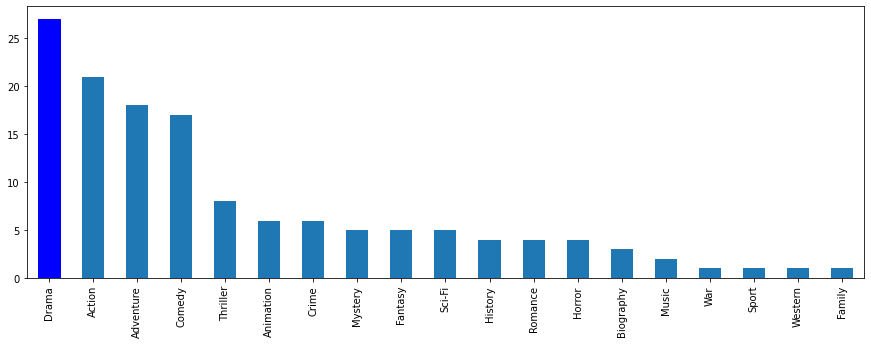

In [21]:
plt.figure(figsize=(15,5))
#plt.hist(genres_count,bins=[0, 5, 6, 7, 8, 9, 10])
barlist = genres_count.plot.bar()
barlist.patches[0].set_color('b')

5 genres appered the most are *Drama*, *Comedy*, *Action*, *Adventure*, *Romance*. Next step we will analyze the appearion of 5 genres through the years.

Action

In [22]:
top_movies_in_genre = data.sort_values(['year','average_score'],ascending=False).groupby('year').head(50)
top_movies_in_genre.groupby('year').size()

year
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
2020    35
2021    50
2022     1
dtype: int64

In [23]:
#Get top 50 movies each year
top_movies_each_year = data.sort_values(['year','average_score'],ascending=False).groupby('year').head(50)

def get_top_genre(genre):
    #Get movies in top_movies_each_year
    top_movies_in_genre = top_movies_each_year.loc[top_movies_each_year.apply(lambda x: genre in x.genre, axis=1)]
    return top_movies_in_genre.groupby('year').size()

drama_ = get_top_genre("Drama")
comedy_ = get_top_genre("Comedy")
action_ = get_top_genre("Action")
adventure_ = get_top_genre("Adventure")
romance_ = get_top_genre("Romance")

In [24]:
df_top_genre = pd.concat({"Drama": drama_,
                         "Comedy": comedy_,
                         "Action": action_,
                         "Adventure": adventure_,
                         "Romance": romance_},
                         axis=1, levels=None)
df_top_genre

,Drama,Comedy,Action,Adventure,Romance
year,,,,,
2010,28,17,20,12,9
2011,33,12,16,14,10
2012,28,17,17,17,7
2013,31,16,12,12,6
2014,32,12,18,15,4
2015,29,14,21,18,4
2016,31,14,15,14,4
2017,32,11,20,14,2
2018,30,19,14,15,6


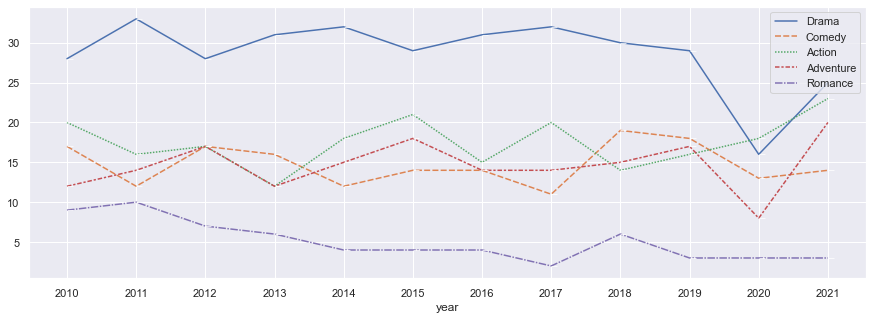

In [25]:
# plt.figure(figsize=(15,5))

# plt.plot(df_top_genre)
# plt.show()

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(range(2010,2022))
sns.lineplot(data=df_top_genre,marker=True)

plt.show()


### Are runtime effect on gross?

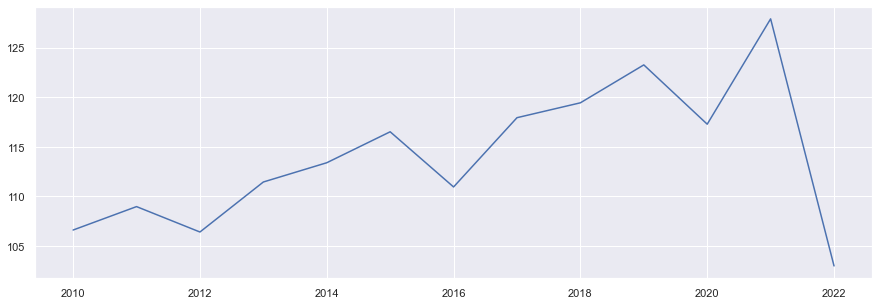

In [26]:
a = data.sort_values(['year','gross']).groupby('year').head(50)
plt.plot(a.groupby('year')['runtime'].mean())